## Assignment 4: Obsevational Studies and Applied ML

### Deadline
November 21st,11:59PM

### Important notes

Make sure you push on GitHub your notebook with all the cells already evaluated. Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented. Back up any hypotheses and claims with data, since this is an important aspect of the course. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything.

Use this legendary link to create your repository: [link](https://classroom.github.com/g/YXtsr0QK)

In [1]:
# Put your imports here
import pandas as pd
import numpy as np

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# regression / matching
import statsmodels.formula.api as smf
import networkx as nx

# machine lerning
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder

In [2]:
data_folder = './data/'

## Task 1: Boosting the economy by incentivizing self-employment

Assume the biggest priority of the local government in 2018 is to increase per-capita income. To do so, the officials plan to adopt a strategy for incentivizing self-employment through a series of campaigns, educational programs, and dedicated funds.

Since it is unethical and impossible in this setting to run a controlled experiment involving citizens (e.g., fire employees and force them to self-employ), the officials have asked you, the data scientist, to establish the effect of self-employment on the economy, relying on observational data.

**A)** You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest?

**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning.

Hint: It is useful to add a notion of confidence to your results and explore the data visually. You are allowed to use the SciPy library.

determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

In [6]:
df = pd.read_csv(data_folder + 'acs2015_county_data.csv')
df.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

Text(0.5, 1.0, 'relation between the % of self employement and the per capita income across all 3212 US counties')

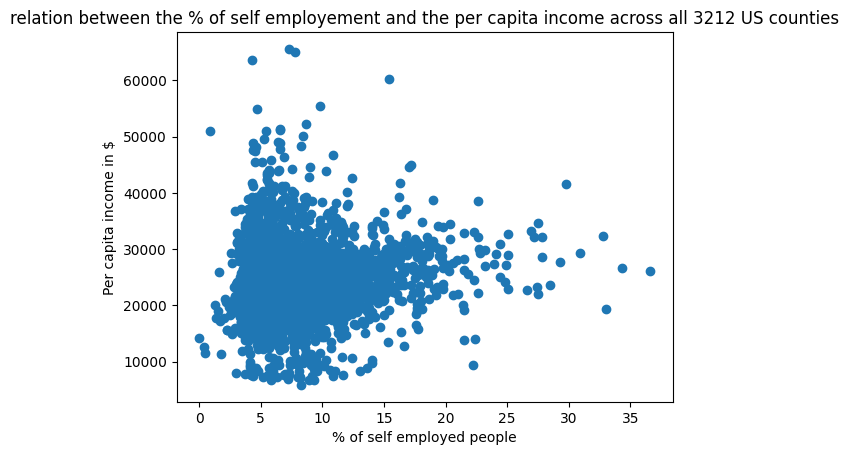

In [8]:
plt.scatter(df['SelfEmployed'], df['IncomePerCap'])
plt.xlabel('% of self employed people')
plt.ylabel('Per capita income in $')
plt.title('relation between the % of self employement and the per capita income across all 3212 US counties')

Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

Text(0.5, 1.0, 'relation between the % of self employement and the per capita income in set A')

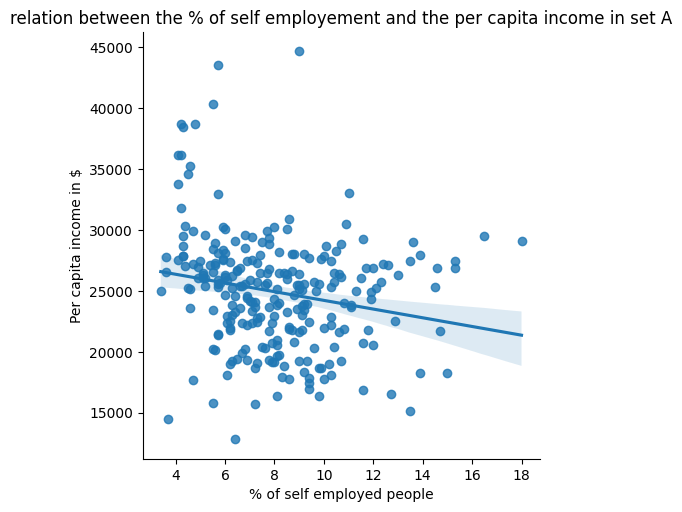

In [16]:
import seaborn as sns
Set_A = ['Wisconsin','Tennessee','Minnesota']
df_set_A = df[df['State'].isin(Set_A)]

sns.lmplot(x='SelfEmployed', y='IncomePerCap', data=df_set_A)
plt.xlabel('% of self employed people')
plt.ylabel('Per capita income in $')
plt.title('relation between the % of self employement and the per capita income in set A')

In which state within set A is the observed effect of self-employment on per-capita income the strongest?


c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'relation between the % of self employement and the per capita income in set A')

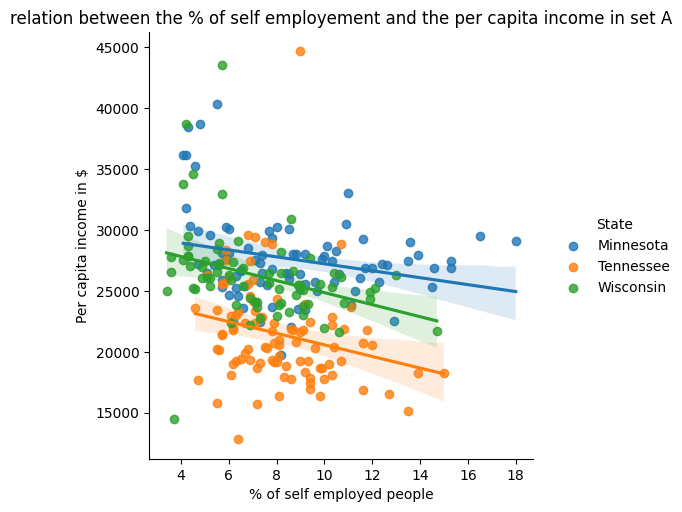

In [17]:
sns.lmplot(x='SelfEmployed', y='IncomePerCap', data=df_set_A, hue = 'State')
plt.xlabel('% of self employed people')
plt.ylabel('Per capita income in $')
plt.title('relation between the % of self employement and the per capita income in set A')

Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? 

Text(0.5, 1.0, 'relation between the % of self employement and the per capita income in set A')

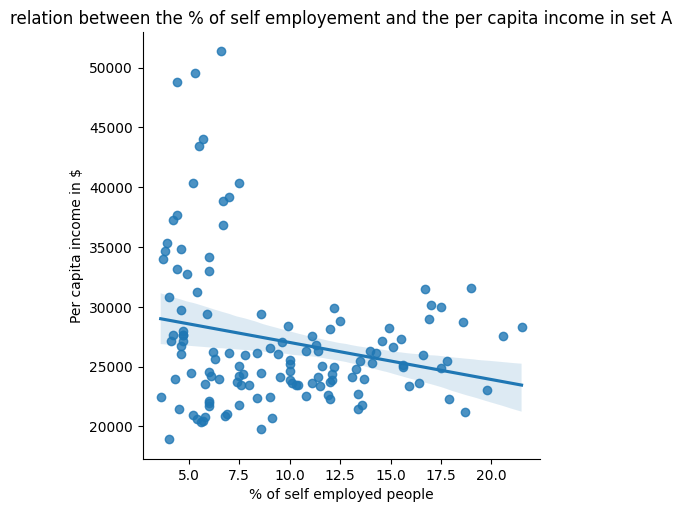

In [18]:
Set_B = ['New Jersey', 'Kansas', 'Rhode Island']
df_set_B = df[df['State'].isin(Set_B)]

sns.lmplot(x='SelfEmployed', y='IncomePerCap', data=df_set_B)
plt.xlabel('% of self employed people')
plt.ylabel('Per capita income in $')
plt.title('relation between the % of self employement and the per capita income in set A')

c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'relation between the % of self employement and the per capita income in set A')

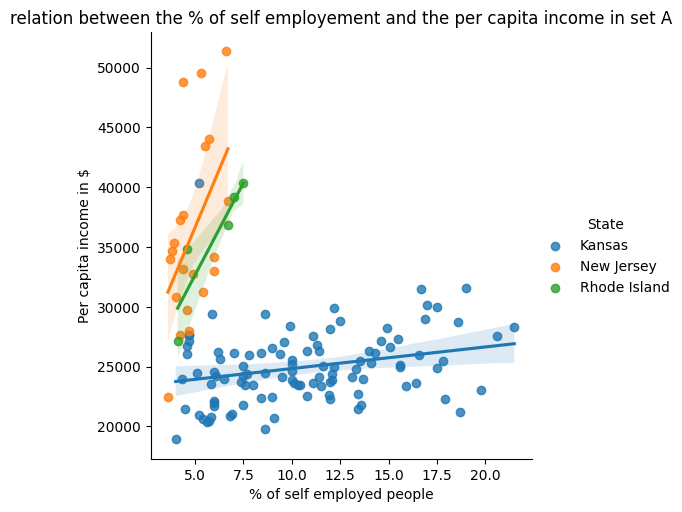

In [19]:
Set_B = ['New Jersey', 'Kansas', 'Rhode Island']
df_set_B = df[df['State'].isin(Set_B)]

sns.lmplot(x='SelfEmployed', y='IncomePerCap', data=df_set_B, hue = 'State')
plt.xlabel('% of self employed people')
plt.ylabel('Per capita income in $')
plt.title('relation between the % of self employement and the per capita income in set A')

## Task 2: All you need is love… And a dog!

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

**A)** Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. Standardize the values of each feature in the data to have mean 0 and variance 1. The use of external libraries is not permitted in part A, except for numpy and pandas.

**B)** Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold. The shelter has a limited capacity and has no other option but to put to sleep animals with a low probability of adoption. What metric (precision, recall, accuracy, or F1-score) and with respect to what class is the most relevant when choosing the threshold in this scenario, and why? Explain your reasoning.

**C)** Reduce the number of features by selecting the subset of the k best features. Use greedy backward selection to iteratively remove features. Evaluate performance and visualize the result using 5-fold cross-validation on the training set as a function of k, where k = 1, 5, 10, 15, 20, 25, 30. Choose the optimal k and justify your choice. Interpret the top-k features and their impact on the probability of adoption.

**D)** Train a random forest. Use 5-fold cross-validation on the training set to fine-tune the parameters of the classifier using a grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth". For the chosen parameters, estimate the performance of your classifier on the test set by presenting the confusion matrix, accuracy, precision, recall, and F1-score with respect to both classes and compare the performance with the performance of the logistic regression. Interpret the results.

You are allowed to use the scikit-learn library to implement your classifiers.

In [21]:
df = pd.read_csv(data_folder + 'aac_intakes_outcomes.csv')
df.head()


,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


In [22]:
df.columns

Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age_upon_outcome_(days)', 'age_upon_outcome_(years)',
       'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days'],
      dtype='object')

Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. Standardize the values of each feature in the data to have mean 0 and variance 1. The use of external libraries is not permitted in part A, except for numpy and pandas.

In [23]:
df.dropna(inplace=True)
df = df.copy()
df['adopted'] = df.outcome_type.apply(lambda r: 1 if r=='Adoption' else 0)
df.drop("outcome_type", axis = 1, inplace=True)
df.head()


,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,...,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,adopted
3,10 years,A047759,2004-04-02 00:00:00,Partner,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,...,2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139,0
11,14 years,A197810,2000-01-21 00:00:00,Partner,Spayed Female,5110,14.0,"(12.5, 15.0]",2014-12-22 15:23:00,12,...,2014-12-08 12:30:00,12,2014,2014-12,Monday,12,1.0,14 days 02:53:00.000000000,14.120139,0
12,16 years,A200922,1997-10-03 00:00:00,Foster,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-22 09:44:00,11,...,2013-10-03 15:47:00,10,2013,2013-10,Thursday,15,1.0,49 days 17:57:00.000000000,49.747917,1
13,14 years,A208755,2000-04-27 00:00:00,Suffering,Neutered Male,5110,14.0,"(12.5, 15.0]",2015-02-17 16:25:00,2,...,2015-02-17 13:17:00,2,2015,2015-02,Tuesday,13,1.0,0 days 03:08:00.000000000,0.130556,0
14,17 years,A210457,1999-06-01 00:00:00,Foster,Neutered Male,6205,17.0,"(15.0, 17.5]",2016-10-07 12:34:00,10,...,2016-09-28 12:05:00,9,2016,2016-09,Wednesday,12,1.0,9 days 00:29:00.000000000,9.020139,1


In [24]:
def split_set(data_to_split, ratio=0.8):
    mask = np.random.rand(len(data_to_split)) < ratio
    return [data_to_split[mask].reset_index(drop=True), data_to_split[~mask].reset_index(drop=True)]


In [26]:
[train, test] = split_set(df)

In [27]:
categorical_columns = ['sex_upon_outcome', 'animal_type', 'intake_condition', 'intake_type', 'sex_upon_intake']
train_categorical = pd.get_dummies(train, columns=categorical_columns)
train_categorical.columns


Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_subtype', 'age_upon_outcome_(days)',
       'age_upon_outcome_(years)', 'age_upon_outcome_age_group',
       'outcome_datetime', 'outcome_month', 'outcome_year',
       'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake', 'animal_id_intake', 'breed', 'color',
       'found_location', 'count', 'age_upon_intake_(days)',
       'age_upon_intake_(years)', 'age_upon_intake_age_group',
       'intake_datetime', 'intake_month', 'intake_year', 'intake_monthyear',
       'intake_weekday', 'intake_hour', 'intake_number', 'time_in_shelter',
       'time_in_shelter_days', 'adopted', 'sex_upon_outcome_Intact Female',
       'sex_upon_outcome_Intact Male', 'sex_upon_outcome_Neutered Male',
       'sex_upon_outcome_Spayed Female', 'sex_upon_outcome_Unknown',
       'animal_type_Bird', 'animal_type_Cat', 'animal_type_Dog',
    

In [31]:
train_categorical = pd.get_dummies(train, columns=categorical_columns)
test_categorical = pd.get_dummies(test, columns=categorical_columns)[train_categorical.columns]

# Assuming 'adopted' is your target variable
train_label = train_categorical['adopted']
train_features = train_categorical.drop('adopted', axis=1)

print('Length of the train dataset: {}'.format(len(train)))

# Assuming 'adopted' is also in the test set
test_label = test_categorical['adopted']
test_features = test_categorical.drop('adopted', axis=1)

print('Length of the test dataset: {}'.format(len(test)))

numeric_columns = train_features.select_dtypes(include=[np.number]).columns
means = train_features[numeric_columns].mean()
stddevs = train_features[numeric_columns].std()

# Standardize the features
train_features_std = (train_features[numeric_columns] - means) / stddevs

Length of the train dataset: 29034
Length of the test dataset: 7314


In [34]:
# Print the columns in train_features
print("Columns in train_features:", train_features.columns)

# Standardize the features in the training set
for c in train_features.columns:
    # Add a check to ensure the column exists in train_features
    if c in means.index and c in stddevs.index:
        train_features_std[c] = (train_features[c] - means[c]) / stddevs[c]
    else:
        print(f"Skipping column '{c}' as it is not found in means or stddevs.")

# Create an empty DataFrame for standardized test features
test_features_std = pd.DataFrame()

# Standardize the features in the test set
for c in test_features.columns:
    # Add a check to ensure the column exists in train_features
    if c in means.index and c in stddevs.index:
        test_features_std[c] = (test_features[c] - means[c]) / stddevs[c]
    else:
        print(f"Skipping column '{c}' as it is not found in means or stddevs.")

# Display the standardized features in the training set
train_features_std.head()

Columns in train_features: Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_subtype', 'age_upon_outcome_(days)',
       'age_upon_outcome_(years)', 'age_upon_outcome_age_group',
       'outcome_datetime', 'outcome_month', 'outcome_year',
       'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake', 'animal_id_intake', 'breed', 'color',
       'found_location', 'count', 'age_upon_intake_(days)',
       'age_upon_intake_(years)', 'age_upon_intake_age_group',
       'intake_datetime', 'intake_month', 'intake_year', 'intake_monthyear',
       'intake_weekday', 'intake_hour', 'intake_number', 'time_in_shelter',
       'time_in_shelter_days', 'sex_upon_outcome_Intact Female',
       'sex_upon_outcome_Intact Male', 'sex_upon_outcome_Neutered Male',
       'sex_upon_outcome_Spayed Female', 'sex_upon_outcome_Unknown',
       'animal_type_Bird', 'animal_type_Cat', 'animal

,age_upon_outcome_(days),age_upon_outcome_(years),outcome_month,outcome_year,outcome_hour,outcome_number,dob_year,dob_month,count,age_upon_intake_(days),age_upon_intake_(years),intake_month,intake_year,intake_hour,intake_number,time_in_shelter_days
0,3.017411,3.017411,-0.830953,-1.068196,0.481208,-0.146863,-3.153521,-0.711216,0.0,3.047891,3.047891,-0.814003,-1.041402,0.503291,-0.146863,-0.299575
1,4.480360,4.480360,1.609672,-1.068196,0.481208,-0.146863,-4.468132,-1.659816,0.0,4.518658,4.518658,1.671996,-1.041402,-0.462148,-0.146863,-0.108442
2,5.211834,5.211834,1.304594,-1.843565,-0.937136,-0.146863,-5.454090,1.185984,0.0,5.254041,5.254041,1.050496,-1.821487,0.503291,-0.146863,0.635783
3,4.480360,4.480360,-1.441109,-0.292826,0.717599,-0.146863,-4.468132,-0.711216,0.0,4.518658,4.518658,-1.435503,-0.261318,-0.140335,-0.146863,-0.400669
4,6.309045,6.309045,1.609672,-1.843565,0.008427,-0.146863,-6.440048,-1.027416,0.0,6.357117,6.357117,1.671996,-1.821487,-0.783960,-0.146863,-0.401989


Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold. The shelter has a limited capacity and has no other option but to put to sleep animals with a low probability of adoption. What metric (precision, recall, accuracy, or F1-score) and with respect to what class is the most relevant when choosing the threshold in this scenario, and why? Explain your reasoning.

c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


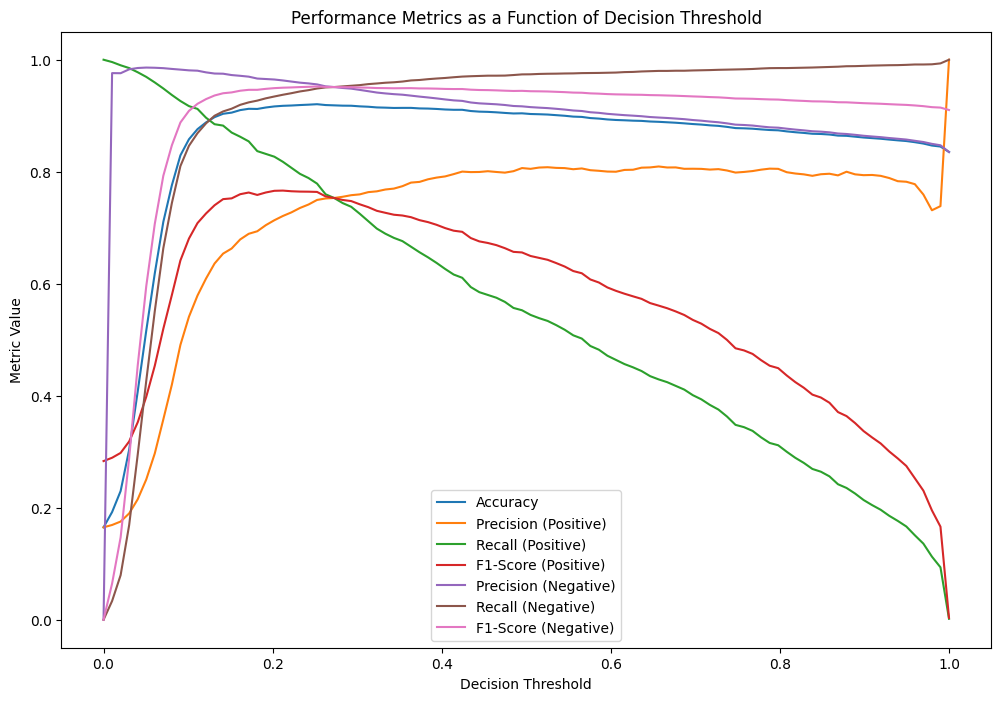

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score



# Train a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(train_features_std, train_label)

# Predict probabilities on the test set
probabilities = classifier.predict_proba(test_features_std)[:, 1]

# Set a range of decision thresholds from 0 to 1
thresholds = np.linspace(0, 1, 100)

# Initialize lists to store metrics at different thresholds
accuracy_scores = []
precision_scores_positive = []
recall_scores_positive = []
f1_scores_positive = []
precision_scores_negative = []
recall_scores_negative = []
f1_scores_negative = []

# Loop through different thresholds
for threshold in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    predictions = (probabilities >= threshold).astype(int)

    # Calculate confusion matrix
    cm = confusion_matrix(test_label, predictions)

    # Calculate performance metrics
    accuracy = accuracy_score(test_label, predictions)
    precision_positive = precision_score(test_label, predictions, pos_label=1)
    recall_positive = recall_score(test_label, predictions, pos_label=1)
    f1_positive = f1_score(test_label, predictions, pos_label=1)
    precision_negative = precision_score(test_label, predictions, pos_label=0)
    recall_negative = recall_score(test_label, predictions, pos_label=0)
    f1_negative = f1_score(test_label, predictions, pos_label=0)

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores_positive.append(precision_positive)
    recall_scores_positive.append(recall_positive)
    f1_scores_positive.append(f1_positive)
    precision_scores_negative.append(precision_negative)
    recall_scores_negative.append(recall_negative)
    f1_scores_negative.append(f1_negative)

# Visualize the metrics as a function of the threshold
plt.figure(figsize=(12, 8))
plt.plot(thresholds, accuracy_scores, label='Accuracy')
plt.plot(thresholds, precision_scores_positive, label='Precision (Positive)')
plt.plot(thresholds, recall_scores_positive, label='Recall (Positive)')
plt.plot(thresholds, f1_scores_positive, label='F1-Score (Positive)')
plt.plot(thresholds, precision_scores_negative, label='Precision (Negative)')
plt.plot(thresholds, recall_scores_negative, label='Recall (Negative)')
plt.plot(thresholds, f1_scores_negative, label='F1-Score (Negative)')
plt.xlabel('Decision Threshold')
plt.ylabel('Metric Value')
plt.title('Performance Metrics as a Function of Decision Threshold')
plt.legend()
plt.show()

# Determine the optimal threshold based on your specific scenario
# You may choose the threshold based on a trade-off between precision and recall depending on your priorities.

Reduce the number of features by selecting the subset of the k best features. Use greedy backward selection to iteratively remove features. Evaluate performance and visualize the result using 5-fold cross-validation on the training set as a function of k, where k = 1, 5, 10, 15, 20, 25, 30. Choose the optimal k and justify your choice. Interpret the top-k features and their impact on the probability of adoption.

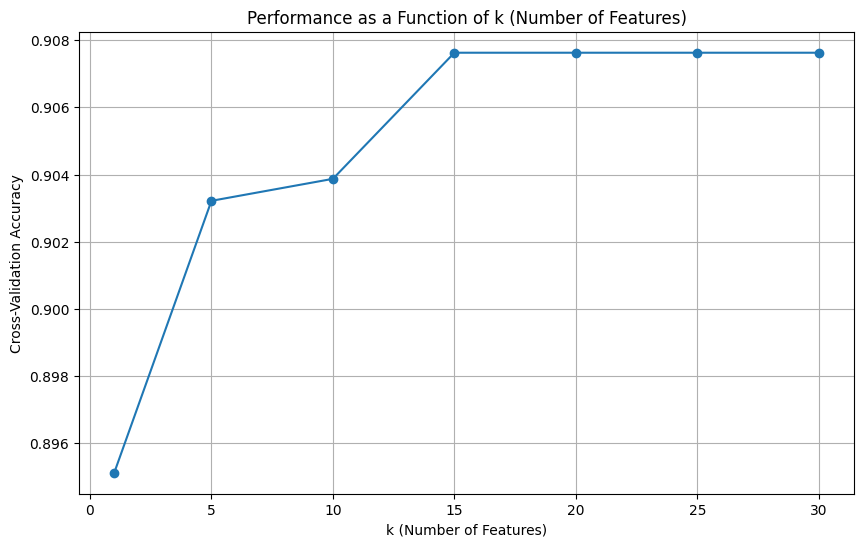

Optimal k: 15
Selected features: Index(['age_upon_outcome_(days)', 'age_upon_outcome_(years)', 'outcome_month',
       'outcome_year', 'outcome_hour', 'outcome_number', 'dob_year',
       'dob_month', 'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'intake_month', 'intake_year', 'intake_hour', 'intake_number',
       'time_in_shelter_days'],
      dtype='object')


In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Define the values of k
k_values = [1, 5, 10, 15, 20, 25, 30]

# Initialize lists to store performance metrics for each k
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through different values of k
for k in k_values:
    # Initialize logistic regression model
    model = LogisticRegression()

    # Initialize RFE with the logistic regression model and the desired number of features to select (n_features_to_select=k)
    rfe = RFE(model, n_features_to_select=k)

    # Fit RFE to the training data and transform the data to select the top-k features
    train_features_rfe = rfe.fit_transform(train_features_std, train_label)

    # Perform 5-fold cross-validation and calculate performance metrics
    scores = cross_val_score(model, train_features_rfe, train_label, cv=5, scoring='accuracy')  # You can choose a different scoring metric if needed

    # Append average performance metrics to lists
    accuracy_scores.append(np.mean(scores))

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Performance as a Function of k (Number of Features)')
plt.xlabel('k (Number of Features)')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)
plt.show()

# Determine the optimal k based on the plot
optimal_k = k_values[np.argmax(accuracy_scores)]
print(f'Optimal k: {optimal_k}')

# Refit RFE with the optimal k to get the selected features
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=optimal_k)
train_features_rfe = rfe.fit_transform(train_features_std, train_label)

# Display the selected features
selected_features = train_features_std.columns[rfe.support_]
print(f'Selected features: {selected_features}')

Train a random forest. Use 5-fold cross-validation on the training set to fine-tune the parameters of the classifier using a grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth". For the chosen parameters, estimate the performance of your classifier on the test set by presenting the confusion matrix, accuracy, precision, recall, and F1-score with respect to both classes and compare the performance with the performance of the logistic regression. Interpret the results.

In [37]:
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold


# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30]
}

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search using 5-fold cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(train_features_std, train_label)

# Get the best parameters from the grid search
best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']

# Initialize the random forest classifier with the best parameters
best_rf_classifier = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)

# Fit the best classifier on the entire training set
best_rf_classifier.fit(train_features_std, train_label)

# Predict on the test set
rf_predictions = best_rf_classifier.predict(test_features_std)

# Evaluate performance on the test set
rf_confusion_matrix = confusion_matrix(test_label, rf_predictions)
rf_accuracy = accuracy_score(test_label, rf_predictions)
rf_precision = precision_score(test_label, rf_predictions, average='binary', pos_label=1)
rf_recall = recall_score(test_label, rf_predictions, average='binary', pos_label=1)
rf_f1_score = f1_score(test_label, rf_predictions, average='binary', pos_label=1)

# Display the results for random forest
print("Random Forest Results:")
print("Confusion Matrix:")
print(rf_confusion_matrix)
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-Score:", rf_f1_score)

# Evaluate performance of logistic regression on the test set for comparison
lr_predictions = cross_val_predict(LogisticRegression(), train_features_std, train_label, cv=5)
lr_confusion_matrix = confusion_matrix(train_label, lr_predictions)
lr_accuracy = accuracy_score(train_label, lr_predictions)
lr_precision = precision_score(train_label, lr_predictions, average='binary', pos_label=1)
lr_recall = recall_score(train_label, lr_predictions, average='binary', pos_label=1)
lr_f1_score = f1_score(train_label, lr_predictions, average='binary', pos_label=1)

# Display the results for logistic regression
print("\nLogistic Regression Results:")
print("Confusion Matrix:")
print(lr_confusion_matrix)
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1-Score:", lr_f1_score)

Random Forest Results:
Confusion Matrix:
[[5984  123]
 [ 196 1011]]
Accuracy: 0.95638501503965
Precision: 0.8915343915343915
Recall: 0.8376139188069595
F1-Score: 0.8637334472447673

Logistic Regression Results:
Confusion Matrix:
[[23825   575]
 [ 2107  2527]]
Accuracy: 0.907625542467452
Precision: 0.814635718891038
Recall: 0.5453172205438066
F1-Score: 0.6533092037228542
